# Importing Libraries

In [1]:
#importing libraries
import pandas as pd
from pandas import Grouper
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import os
import calendar
# Geovisualization library
import folium
from folium.plugins import CirclePattern, HeatMap, HeatMapWithTime

# Importing Data

In [2]:
# Defining path
path=r'/Users/guillaumemac/Achievement 6'

In [3]:
data=pd.read_csv(os.path.join(path, '02 Data','Original Data','citibike.csv'))

# Data Exploration, Cleaning & Wrangling

In [4]:
#Checking the data shape
data.shape

(50000, 18)

In [5]:
#Checking for null/missing values
data.isna().sum()

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
dtype: int64

In [6]:
#Dropping index with null values
data = data.dropna()

In [7]:
#Converting Birth Year from Float to Int
data['birth_year'] = data['birth_year'].apply(np.int64)

In [8]:
#Dropping "trip_id" column
data = data.drop(columns='trip_id',axis=1)

In [9]:
#Checking the changes made
data.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,1
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,1
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,2
5,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,2


In [10]:
#Dropping the index with gender code  = 0
data = data.drop(data[data.gender == 0].index)

# Exploration Findings

#### The entire data is for the month of September & year = 2013
#### The 'Gender' column is numerically coded and needs to be categorized
#### The 'trip_duration' seems to be in seconds and needs to be converted to minutes for easy visualisation 

# Data Pre-Processing

In [11]:
#Processing the Start & End date time

#start time
data.start_time = pd.to_datetime(data.start_time, format='%Y-%m-%d %H:%M:%S')
data['start_year'] = data.start_time.apply(lambda x: x.year)
data['start_month'] = data.start_time.apply(lambda x: x.month)
data['start_week'] = data.start_time.apply(lambda x: x.week)
data['start_day'] = data.start_time.apply(lambda x: x.day)
data['start_hour'] = data.start_time.apply(lambda x: x.hour)

#end time
data.end_time = pd.to_datetime(data.end_time, format='%Y-%m-%d %H:%M:%S')
data['end_year'] = data.start_time.apply(lambda x: x.year)
data['end_month'] = data.end_time.apply(lambda x: x.month)
data['end_week'] = data.end_time.apply(lambda x: x.week)
data['end_day'] = data.end_time.apply(lambda x: x.day)
data['end_hour'] = data.end_time.apply(lambda x: x.hour)

In [12]:
# Create a function to categorize Gender
def gender_cat(gender):
    if gender == 1:
        return 'Male'
    elif gender == 2:
        return 'Female'
    else:
        return 'Unknown'

In [13]:
#Applying the function to the Gender Column
data['Gender_Cat'] = data['gender'].apply(gender_cat)

In [14]:
#Creating a function to convert trip duration into minutes
def time_convert(secs):
  days = secs//86400
  hours = (secs - days*86400)//3600
  mins = (secs - days*86400 - hours*3600)//60
  return mins  

In [15]:
#Applying the function to the Trip Duration Column
data['trip_duration_min'] = data['trip_duration'].apply(time_convert)

In [16]:
#Creating a back up dataframe
data_backup = data.copy()

# Biker Data - Analysis & Visualisation

### Generic Number of Bikes Stats - September 2013

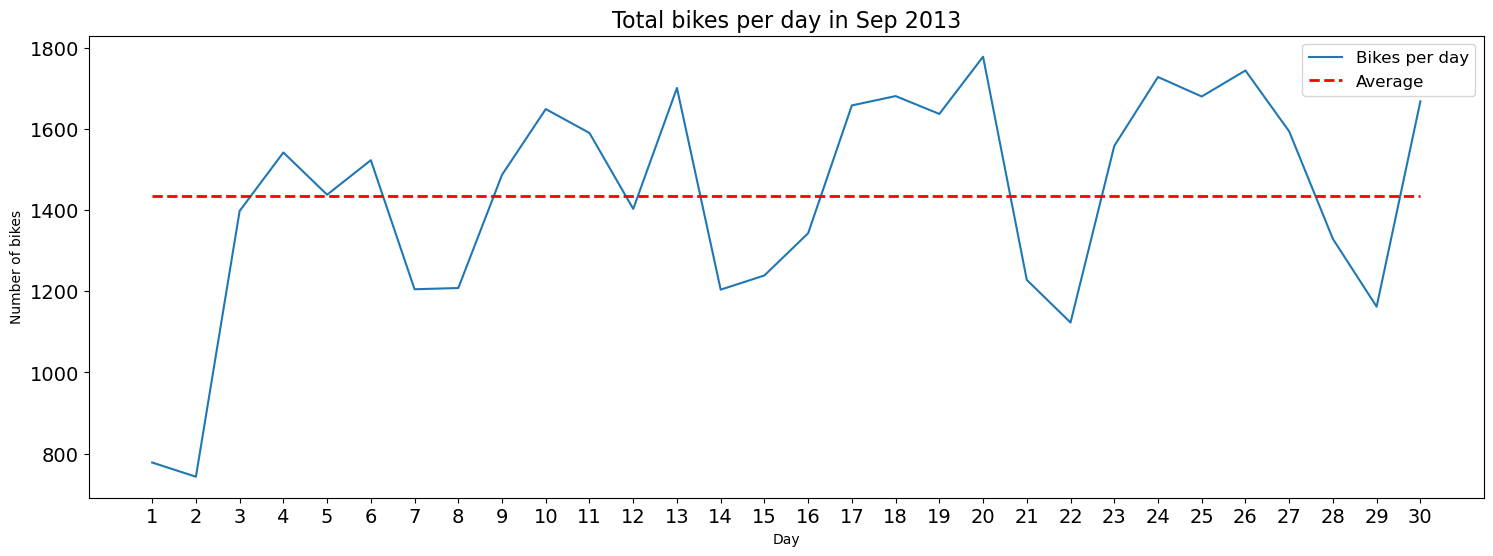

In [17]:
# Plotting Biker Stats for the entire september month - 2013
bike_daily = pd.DataFrame(data.groupby('start_day').size())
bike_daily['MEAN'] = data.groupby('start_day').size().mean()
bike_daily['STD'] = data.groupby('start_day').size().std()

# Plot total accidents per day, UCL, LCL and moving-average
plt.figure(figsize=(18,6))
data.groupby('start_day').size().plot(label='Bikes per day')
bike_daily['MEAN'].plot(color='red', linewidth=2, label='Average', ls='--')
plt.title('Total bikes per day in Sep 2013', fontsize=16)
plt.xlabel('Day')
plt.xticks(np.arange(1,31))
plt.ylabel('Number of bikes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':12})
plt.savefig('Total bikes per day in Sep 2013.png')

# Plot Findings

#### The 'number of bikes' rises sharply in first 5 days of the month
#### The 'number of bikes' after 5th Sep is consistenly rise above & fall below average
#### There is a sharp drop in the 'number of bikes' between 20-22 Sep
#### The consistent drop in 'number of bikes' around certain dates suggests that these dates are weekends

## 'Number of Bikes' Weekly Stats - Heatmap

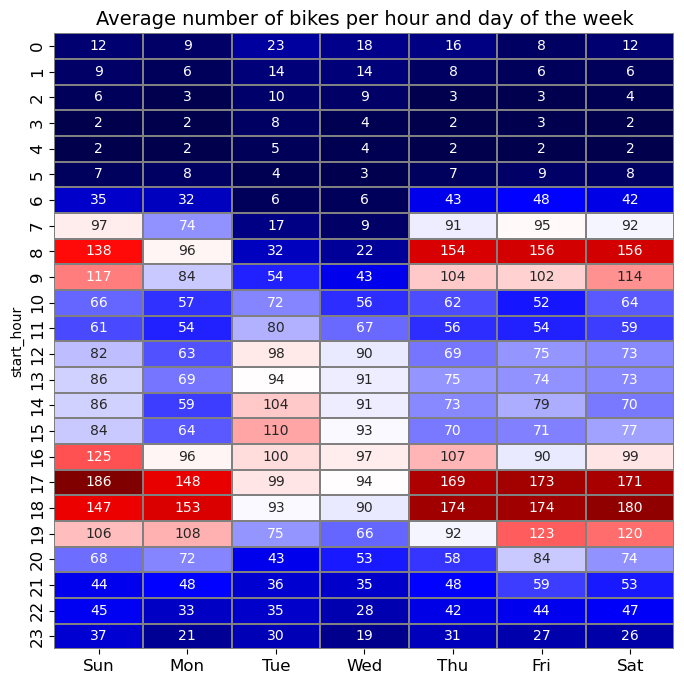

In [18]:
# Creating a pivot table by crossing the hour by the day of the week and calculate the average number of bikes for each crossing
bikes_pivot_table = data.pivot_table(values='start_day', index='start_hour', columns='weekday', aggfunc=len)
bikes_pivot_table_date_count = data.pivot_table(values='start_day', index='start_hour', columns='weekday', aggfunc=lambda x: len(x.unique()))
bikes_average = bikes_pivot_table/bikes_pivot_table_date_count
bikes_average.columns = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Using seaborn heatmap
plt.figure(figsize=(8,8))
plt.title('Average number of bikes per hour and day of the week', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(bikes_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")
plt.savefig('Average number of bikes per hour and day of the week.png')

# Heatmap Findings

#### Sunday, Thursday, Friday & Saturday has the highest 'number of bikes' for 8 AM time slot
#### Sunday, Thursday, Friday & Saturday has the highest 'number of bikes' for 5-7 PM time slot
#### The 10 AM - 3 PM time slot has moderate 'number of bikes' 
#### Tuesdays & Wednesdays has low to moderate 'number of bikes' for any given time slot

## Number of Bikes in a Day - Plot

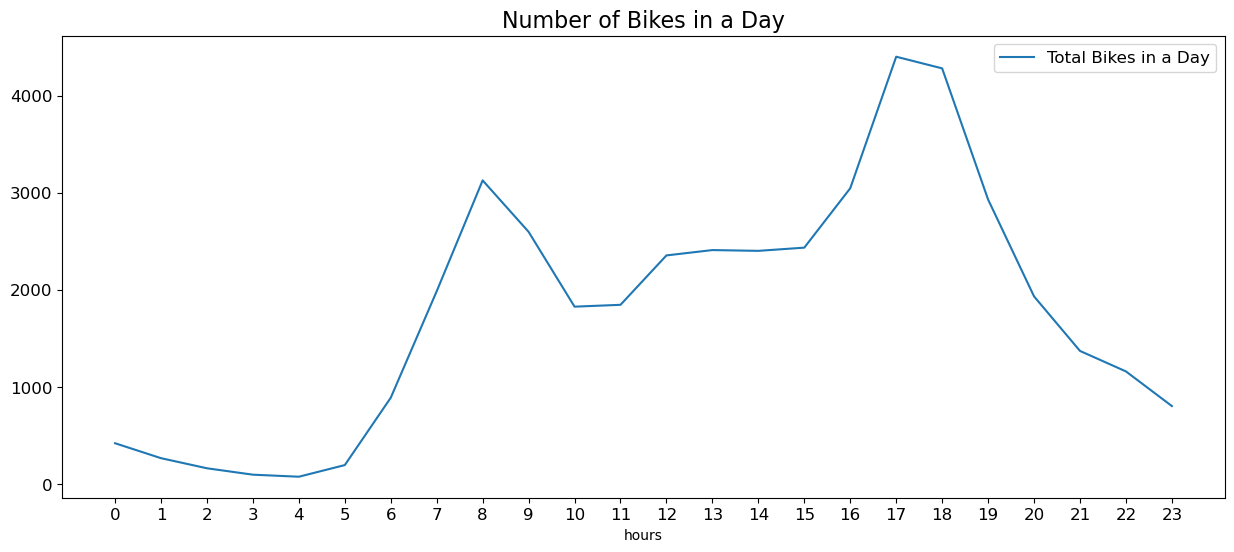

In [19]:
#Plotting - Bikes per Day
plt.figure(figsize=(15,6))

data.groupby('start_hour').size().plot(label = 'Total Bikes in a Day')
plt.title('Number of Bikes in a Day', fontsize=16)
plt.xlabel('hours')
plt.xticks(np.arange(0,24))
plt.legend(prop={'size':12})
plt.tick_params(labelsize=12)
plt.savefig('Number of Bikes in a Day.png')

## Plot Findings

#### The 'number of bikes' on the road is highest at 8 AM & between 5 - 6 PM
#### The 'number of bikes' on the road is at its lowest around 3 -4 AM

## 'Number of Bikes' in a Week - Plot

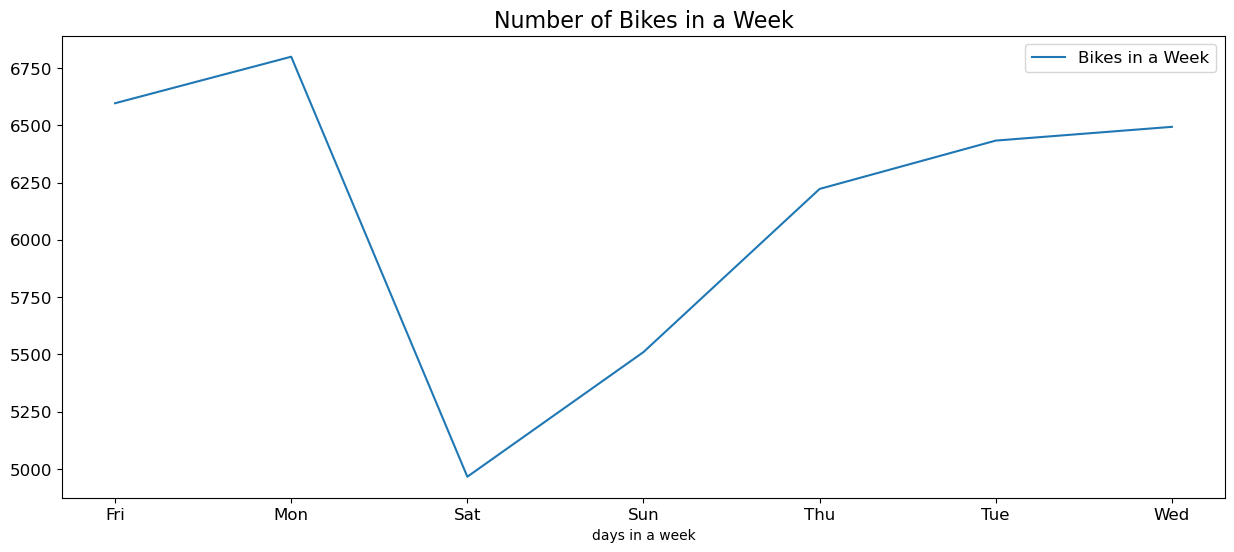

In [20]:
# Number of Bikes in a week - plot
plt.figure(figsize=(15,6))

data.groupby('weekday').size().plot(label = 'Bikes in a Week')
plt.title('Number of Bikes in a Week', fontsize=16)
plt.xlabel('days in a week')
plt.legend(prop={'size':12})
plt.tick_params(labelsize=12)
plt.savefig('Number of Bikes in a Week.png')

## Plot Findings

#### The 'number of bikes' is low on Saturday
#### The 'number of bikes' is higest on Monday

### 'Number of Bikes' per week in a month

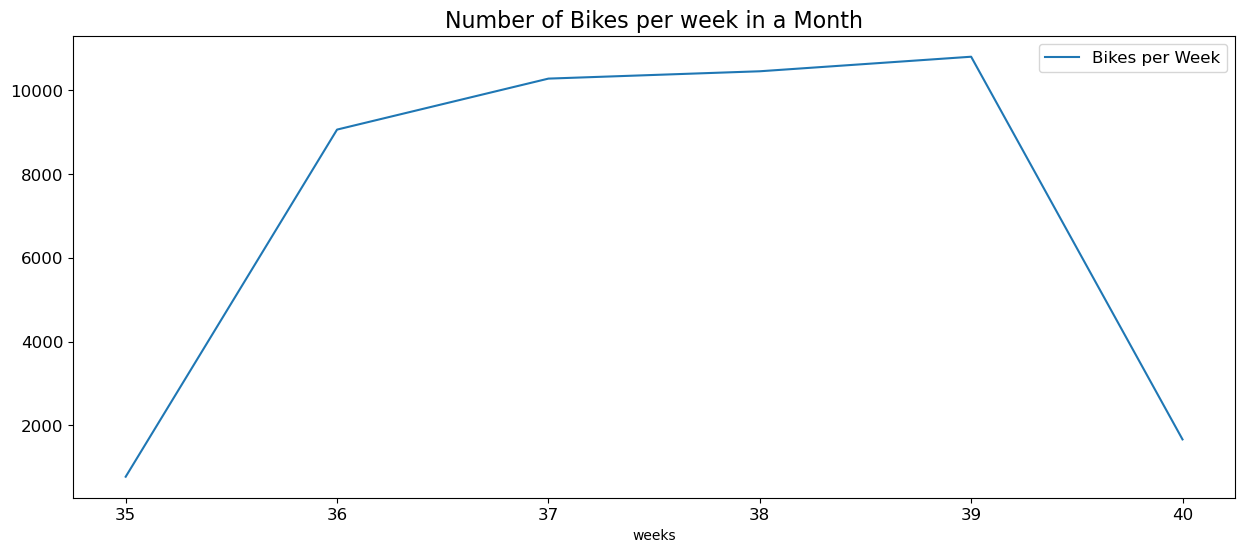

In [21]:
# Plotting - Bikes in a Month
plt.figure(figsize=(15,6))

data.groupby('start_week').size().plot(label = 'Bikes per Week')
plt.title('Number of Bikes per week in a Month', fontsize=16)
plt.xlabel('weeks')
plt.legend(prop={'size':12})
plt.tick_params(labelsize=12)
plt.savefig('Number of Bikes per week in a Month.png')

## Plot Findings

#### 'Number of bikes' gradually rises from week #36 (week#2 of Sep 2013) till week #39 (week#5 of Sep 2013)

# Gender - Analysis & Visualisation

### Biker's Gender Stats - Plot

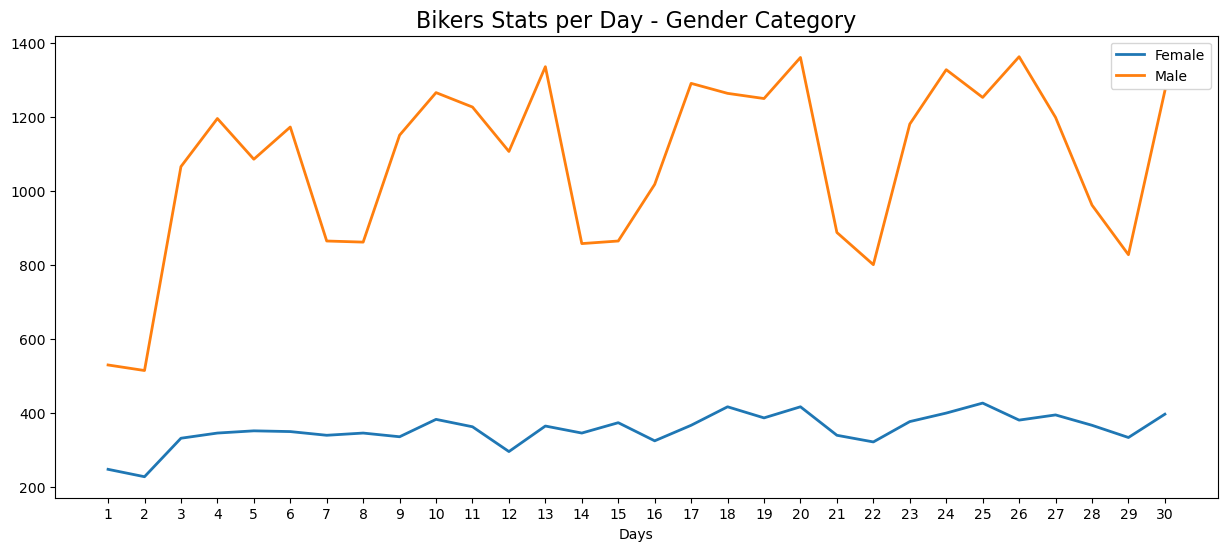

In [22]:
# Bikers Stats - Gender Category
bikes_stat_gender = data.pivot_table(values='gender', index='start_day', 
columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Bikers Stats per Day - Gender Category', fontsize=16)
plt.xlabel('Days')
plt.xticks(np.arange(1,31))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Bikers Stats per Day - Gender Category.png')

## Findings

#### There are fewer Female bikers than Male bikers 
#### Number of Female bikers are consistent in the month, however, Number of Male bikers is not consistent.

### Male Bikers  Stats - Heatmap

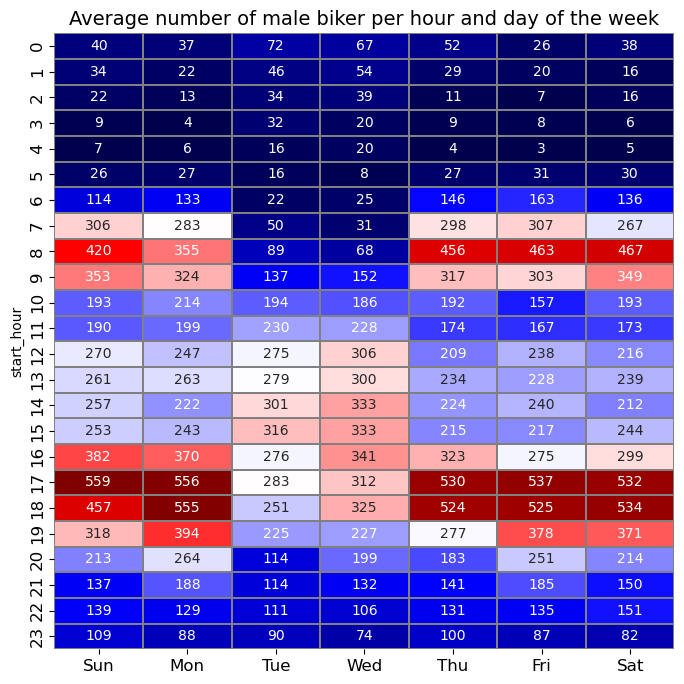

In [23]:
# Male Bikers Heat Map
male_biker_df = data[data['gender'] == 1]
male_biker_pivot_table = male_biker_df.pivot_table(values='gender', index='start_hour', columns='weekday', aggfunc=len)
male_biker_pivot_table_date_count = male_biker_df.pivot_table(values='gender', index='start_hour', columns='weekday', aggfunc=lambda x: len(x.unique()))
male_biker_avg = male_biker_pivot_table/male_biker_pivot_table_date_count
male_biker_avg.columns = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Using seaborn heatmap
plt.figure(figsize=(8,8))
plt.title('Average number of male biker per hour and day of the week', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(male_biker_avg.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")
plt.savefig('Average number of male biker per hour and day of the week.png')

## Heatmap Findings

##### Number of Male bikers are high during 8 - 9 AM & 4 - 7 PM time slot on Sunday, Monday, Thursday, Friday & Saturday
##### Number of Male bikers is moderate betwen 10 AM - 3 PM timeslot on any day
##### Tuesday & Wednesday have low to moderate number of Male Bikers

### Male Bikers in Month of September 2013

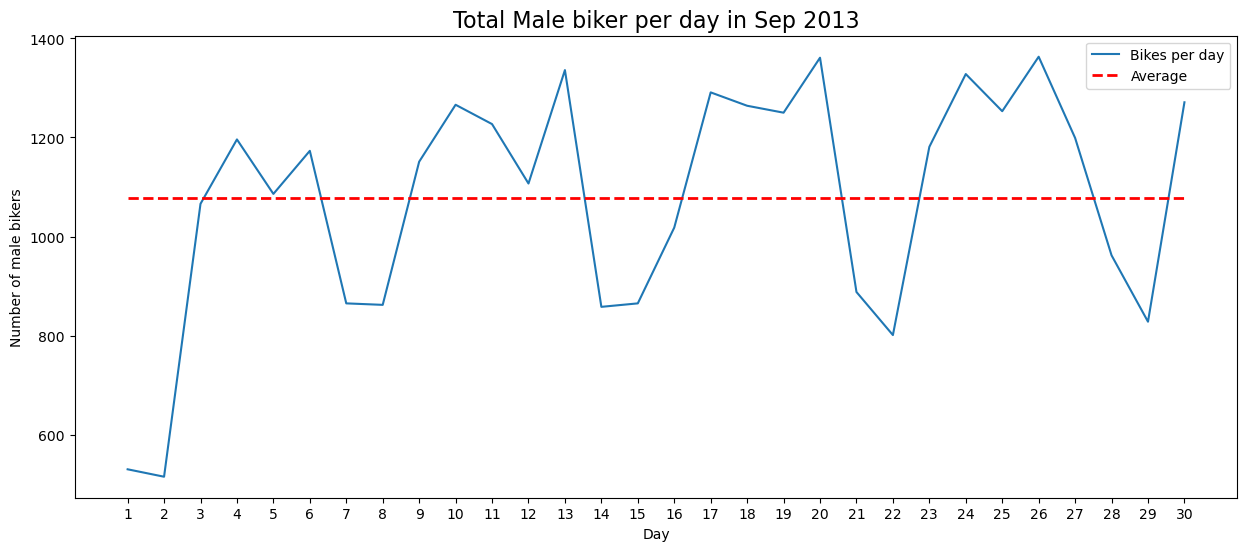

In [24]:
#  Male Bikers in month of september 2013
male_biker_daily = pd.DataFrame(male_biker_df.groupby('start_day').size())
male_biker_daily['MEAN'] = male_biker_df.groupby('start_day').size().mean()
male_biker_daily['STD'] = male_biker_df.groupby('start_day').size().std()

plt.figure(figsize=(15,6))
male_biker_df.groupby('start_day').size().plot(label='Bikes per day')
male_biker_daily['MEAN'].plot(color='red', linewidth=2, label='Average', ls='--')
plt.title('Total Male biker per day in Sep 2013', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of male bikers')
plt.tick_params(labelsize=10)
plt.xticks(np.arange(1,31))
plt.legend(prop={'size':10})
plt.savefig('Total Male biker per day in Sep 2013.png')

### Findings

#### Number of Male Bikers is at its lowest on 2 Sep 2013
#### Number of Male Bikers are at its highest on 13, 20 & 26th Sep 2013
#### Number of Male Bikers is above average on 3-6 , 9-13, 17-20 & 23-27 Sep 2013

## Number of Male Bikers in Day

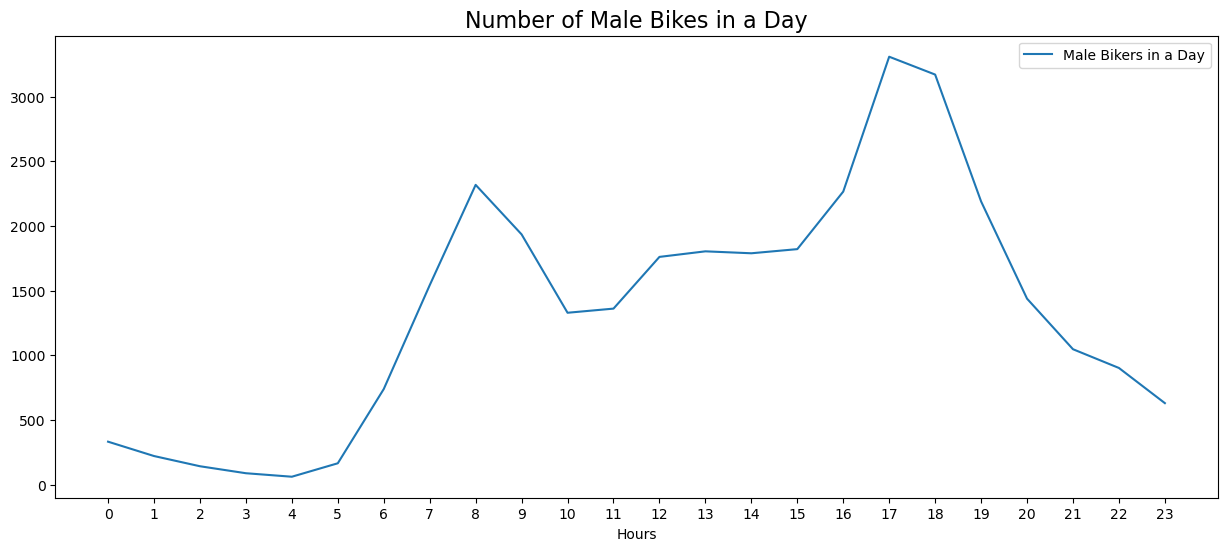

In [25]:
# Plotting - Male Biker in a Day
plt.figure(figsize=(15,6))

male_biker_df.groupby('start_hour').size().plot(label = 'Male Bikers in a Day')
plt.title('Number of Male Bikes in a Day', fontsize=16)
plt.xlabel('Hours')
plt.xticks(np.arange(0,24))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Number of Male Bikes in a Day.png')

## Plot Findings

#### Number of Male Bikers are low during early hours i.e. 4 - 5 AM
#### Number of Male Bikers are high during 8 AM & 5 - 6 PM timeslot
#### Number of Male Bikers sharply increase between 5 - 8 AM timeslot
#### There are moderate number of Male Bikers on road after 8 PM 

### **Male Bikers Trip Duration - Plot**

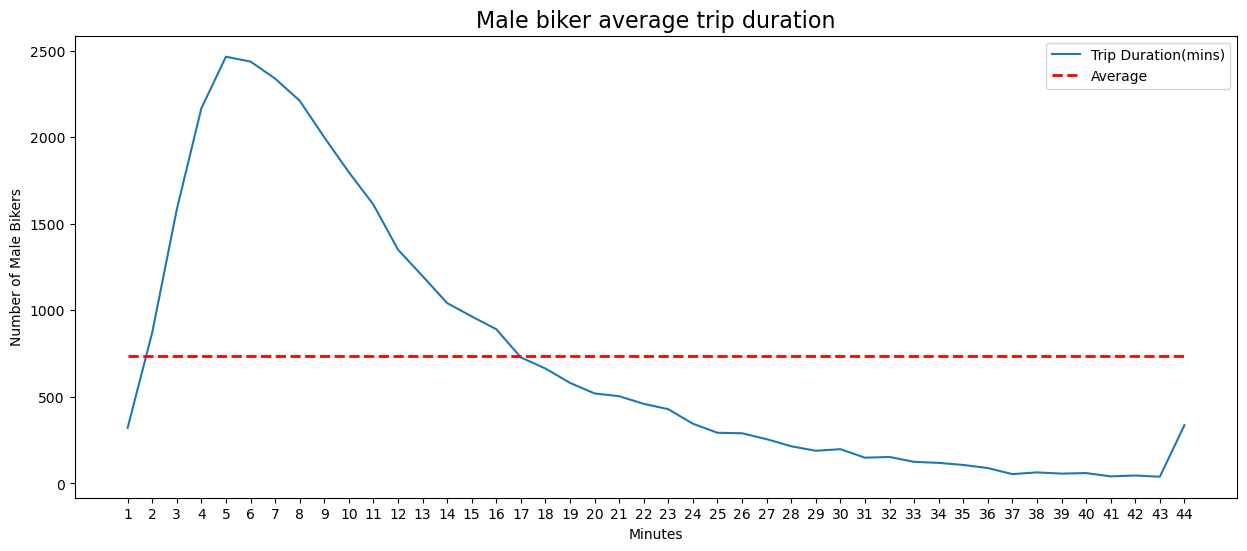

In [26]:
# Male Bikers Average Trip Duration
male_biker_daily_trip = pd.DataFrame(male_biker_df.groupby('trip_duration_min').size())
male_biker_daily_trip['MEAN'] = male_biker_df.groupby('trip_duration_min').size().mean()
male_biker_daily_trip['STD'] = male_biker_df.groupby('trip_duration_min').size().std()

# Plot total accidents per day, UCL, LCL and moving-average
plt.figure(figsize=(15,6))
male_biker_df.groupby('trip_duration_min').size().plot(label='Trip Duration(mins)')
male_biker_daily_trip['MEAN'].plot(color='red', linewidth=2, label='Average', ls='--')
plt.title('Male biker average trip duration', fontsize=16)
plt.xlabel('Minutes')
plt.xticks(np.arange(1,45))
plt.ylabel('Number of Male Bikers')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':10})
plt.savefig('Male biker average trip duration.png')

## Plot Findings

#### A large number of Male Biker's average trip duration is between 5 - 8 minutes
#### A very few Male Biker's average trip duration is between 40 - 43 minutes

## Female Bikers  Stats - Heatmap

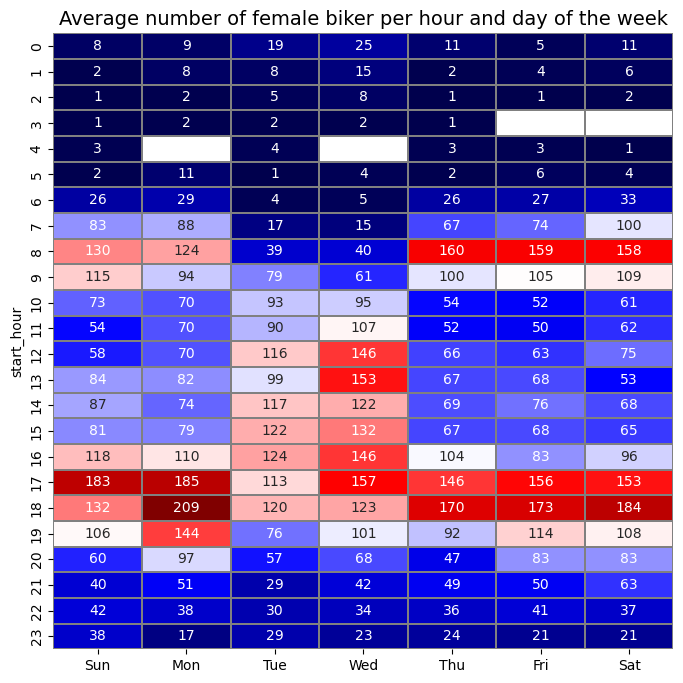

In [27]:
# Female Bikers Heat Map
female_biker_df = data[data['gender'] == 2]
female_biker_pivot_table = female_biker_df.pivot_table(values='gender', index='start_hour', columns='weekday', aggfunc=len)
female_biker_pivot_table_date_count = female_biker_df.pivot_table(values='gender', index='start_hour', columns='weekday', aggfunc=lambda x: len(x.unique()))
female_biker_avg = female_biker_pivot_table/female_biker_pivot_table_date_count
female_biker_avg.columns = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Using seaborn heatmap
plt.figure(figsize=(8,8))
plt.title('Average number of female biker per hour and day of the week', fontsize=14)
plt.tick_params(labelsize=10)
sns.heatmap(female_biker_avg.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")
plt.savefig('Average number of female biker per hour and day of the week.png')

## Heatmap Findings

##### Number of Female bikers are high during 8 - 9 AM & 5 - 6 PM time slot on Sunday, Monday, Thursday, Friday & Saturday
##### Number of Female bikers is moderate betwen 10 AM - 3 PM timeslot on any day
##### Tuesday & Wednesday have low to moderate number of Female Bikers
##### There are very few female bikers on the road after 8 PM
##### There is a high number of Female Bikers on Wednesday during 12 - 1 PM slot & 4-5 PM slot
##### There are very-very few Female Bikers on the road during the early hours i.e. 5 AM

## Female Bikers in Month of September 2013

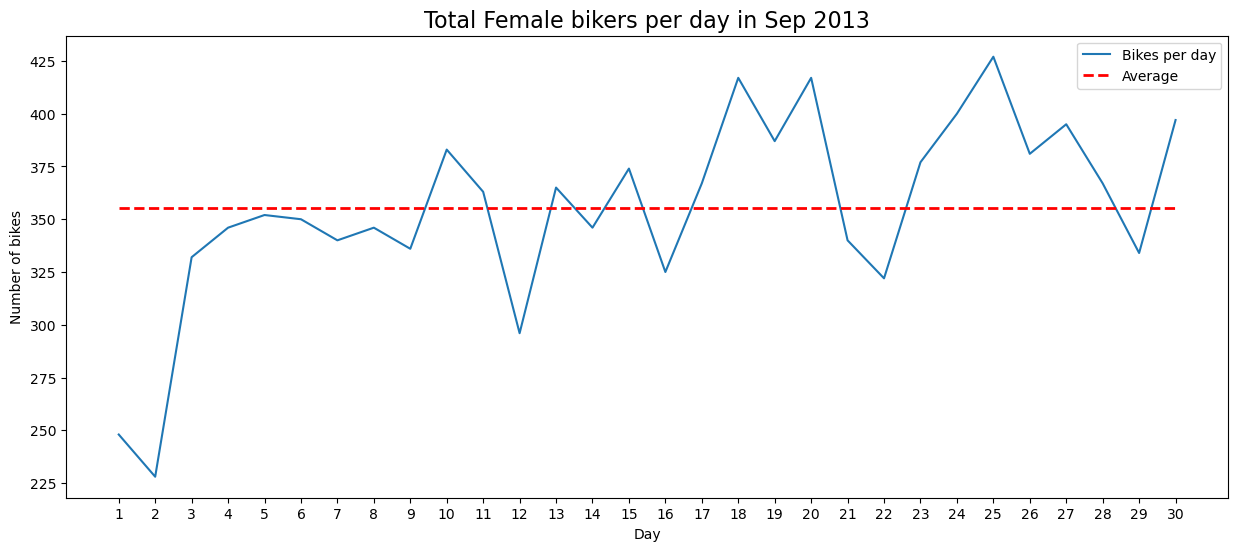

In [28]:
#Female Bikers in month of September 2013
female_biker_daily = pd.DataFrame(female_biker_df.groupby('start_day').size())
female_biker_daily['MEAN'] = female_biker_df.groupby('start_day').size().mean()
female_biker_daily['STD'] = female_biker_df.groupby('start_day').size().std()

plt.figure(figsize=(15,6))
female_biker_df.groupby('start_day').size().plot(label='Bikes per day')
female_biker_daily['MEAN'].plot(color='red', linewidth=2, label='Average', ls='--')
plt.title('Total Female bikers per day in Sep 2013', fontsize=16)
plt.xlabel('Day')
plt.xticks(np.arange(1,31))
plt.ylabel('Number of bikes')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':10})
plt.savefig('Total Female bikers per day in Sep 2013.png')

## Plot Findings

#### Number of Female Bikers is at its lowest on 2 Sep 2013
#### Number of Female Bikers are at its highest on 10, 18, 20 & 25th Sep 2013
#### Number of Female Bikers is above average during 10-11 , 13-15, 17-21 & 23-28 Sep 2013
#### Number of Female Bikers is consistenly below average during first 10 days of the month i.e. 01 - 10 Sep 2013

## Number of Female Bikers in Day

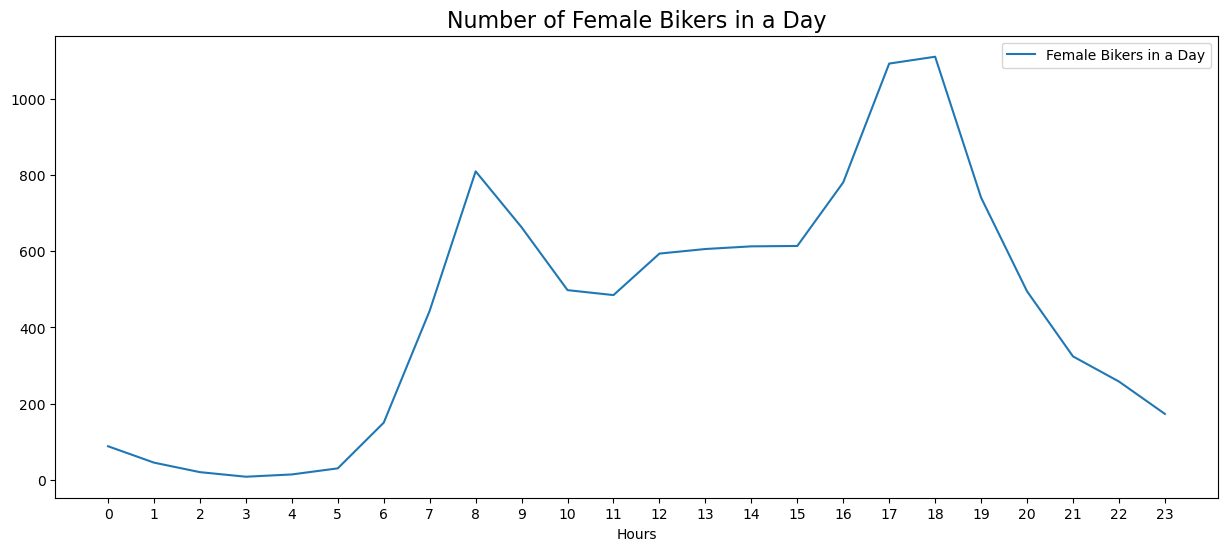

In [29]:
# Plotting - Female Biker in a Day
plt.figure(figsize=(15,6))

female_biker_df.groupby('start_hour').size().plot(label = 'Female Bikers in a Day')
plt.title('Number of Female Bikers in a Day', fontsize=16)
plt.xlabel('Hours')
plt.xticks(np.arange(0,24))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Number of Female Bikers in a Day.png')

## Plot Findings

#### Number of Female Bikers are low during early hours i.e. 4 - 5 AM
#### Number of Female Bikers are high during 8 AM & 5 - 6 PM timeslot
#### Number of Female Bikers sharply increase between 6 - 8 AM timeslot
#### There are moderate-low number of Female Bikers on road after 8 PM 

## Female Bikers Trip Duration - Plot

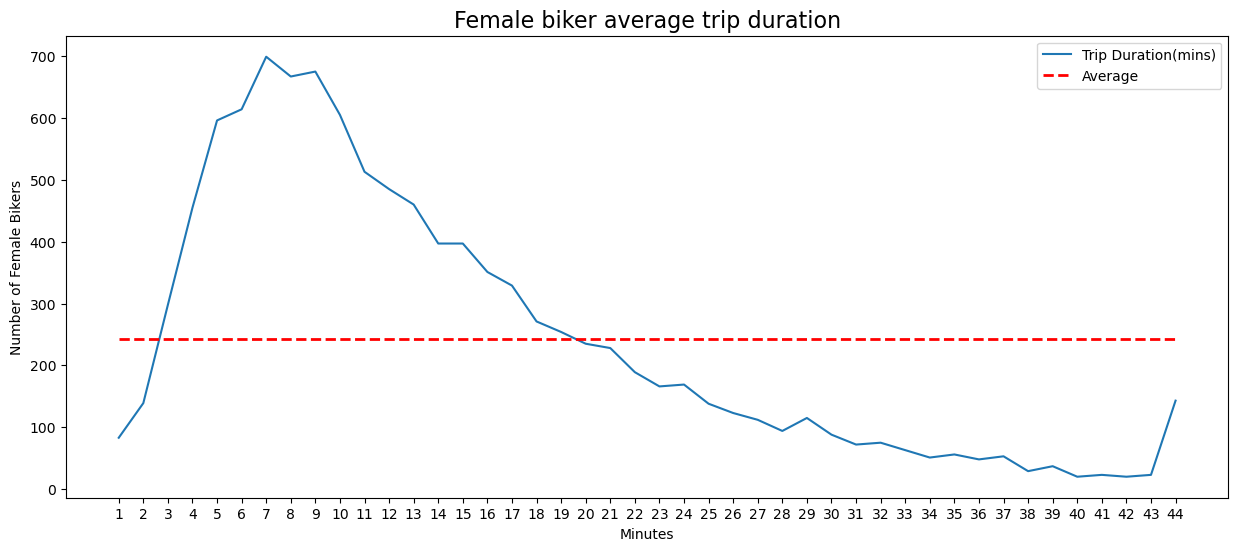

In [30]:
# Female Bikers Average Trip Duration
female_biker_daily_trip = pd.DataFrame(female_biker_df.groupby('trip_duration_min').size())
female_biker_daily_trip['MEAN'] = female_biker_df.groupby('trip_duration_min').size().mean()
female_biker_daily_trip['STD'] = female_biker_df.groupby('trip_duration_min').size().std()

# Plot total accidents per day, UCL, LCL and moving-average
plt.figure(figsize=(15,6))
female_biker_df.groupby('trip_duration_min').size().plot(label='Trip Duration(mins)')
female_biker_daily_trip['MEAN'].plot(color='red', linewidth=2, label='Average',ls='--')
plt.title('Female biker average trip duration', fontsize=16)
plt.xlabel('Minutes')
plt.xticks(np.arange(1,45))
plt.ylabel('Number of Female Bikers')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':10})
plt.savefig('Female biker average trip duration.png')

## Plot Findings

#### A large number of Female Biker's average trip duration is between 7 - 10 minutes
#### A very few Female Biker's average trip duration is between 40 - 43 minutes

## Generation Grouping- Analysis & Visualisation

###### Currently, five generations make up our society. Each of those five generations has an active role in the marketplace. Depending on the specific workplace, the workforce includes four to five generations. Here are the birth years for each generation; I will focus mainly on Centennials [born after 1996], Millennials [born between 1977 - 1995] & GenX [born between 1965 - 1976] & Baby Boomers [born between 1946 - 1964]
[source: https://genhq.com/faq-info-about-generations/]

## Centennials Bikers Analysis

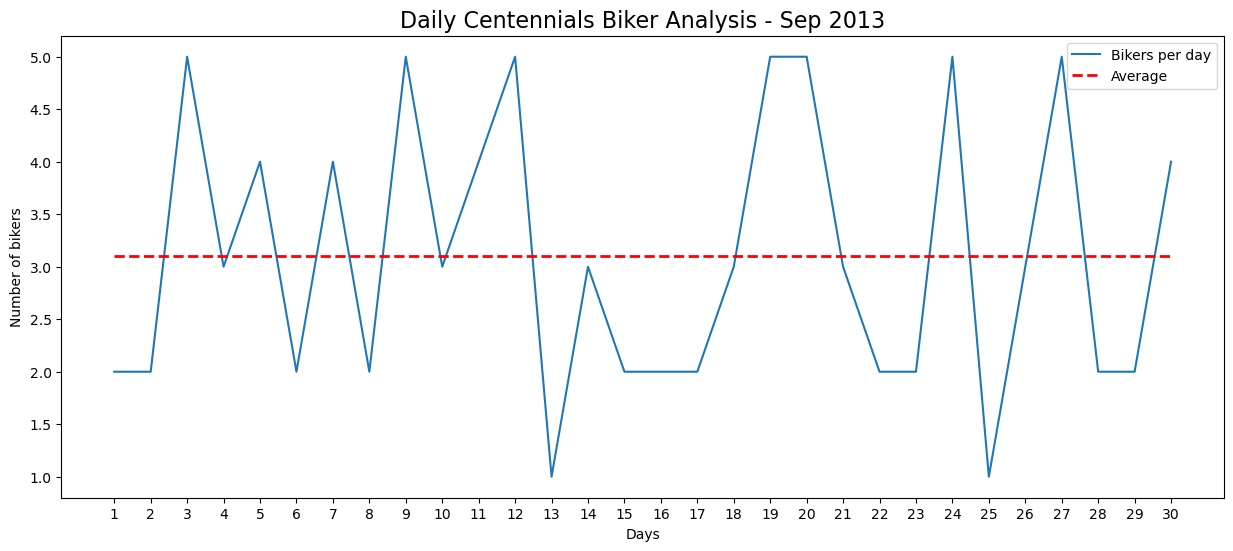

In [31]:
# Centennials Bikers Analysis - Month
CentennialBikers_df = data[data['birth_year'] >= 1996]

CentennialBikers_daily = pd.DataFrame(CentennialBikers_df.groupby('start_day').size())
CentennialBikers_daily['MEAN'] = CentennialBikers_df.groupby('start_day').size().mean()

plt.figure(figsize=(15,6))

CentennialBikers_df.groupby('start_day').size().plot(label='Bikers per day')
CentennialBikers_daily['MEAN'].plot(color='red', linewidth=2, label='Average',ls='--')
plt.title('Daily Centennials Biker Analysis - Sep 2013', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Number of bikers')
plt.xticks(np.arange(1,31))
plt.tick_params(labelsize=10)
plt.legend(prop={'size':10})
plt.savefig('Daily Centennials Biker Analysis - Sep 2013.png')

## Plot Findings

#### Number of Centennial bikers are high on 3, 9, 19, 20, 24, 27 Sep 2013
#### Number of Centennial bikers are very low on 13, 25 Sep 2013

## Centennials Bikers Analysis Per  Week

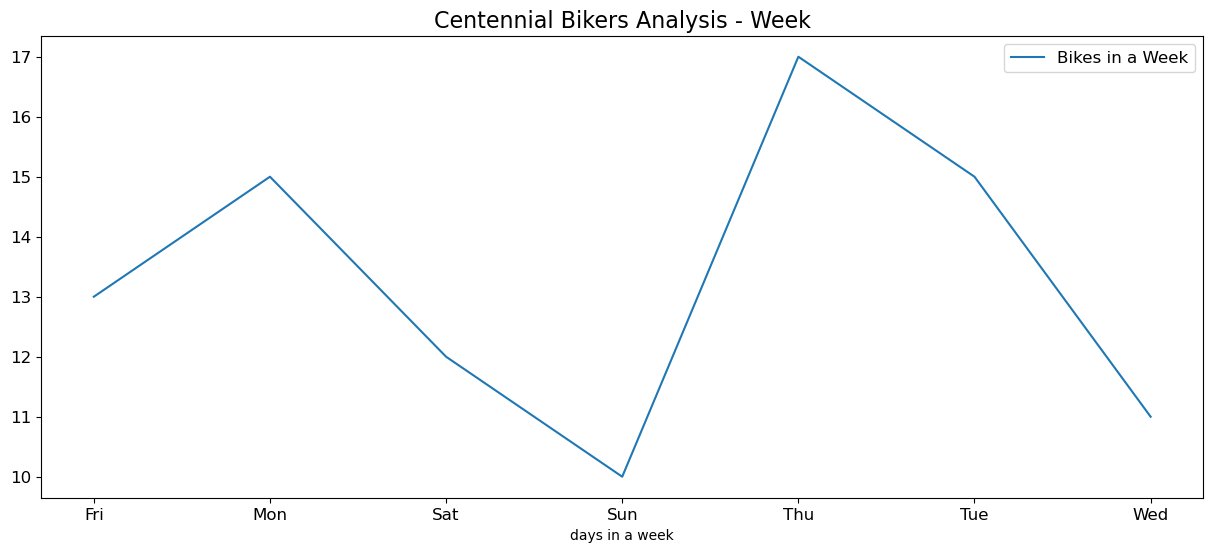

In [32]:
# Centennial Bikers Analysis - Week
plt.figure(figsize=(15,6))

CentennialBikers_df.groupby('weekday').size().plot(label = 'Bikes in a Week')
plt.title('Centennial Bikers Analysis - Week', fontsize=16)
plt.xlabel('days in a week')
plt.legend(prop={'size':12})
plt.tick_params(labelsize=12)
plt.savefig('Centennial Bikers Analysis - Week.png')

## Plot Findings

#### The number of Centennial bikers is low on Sunday & high on Thursday



## Centennials Bikers Analysis Per Day

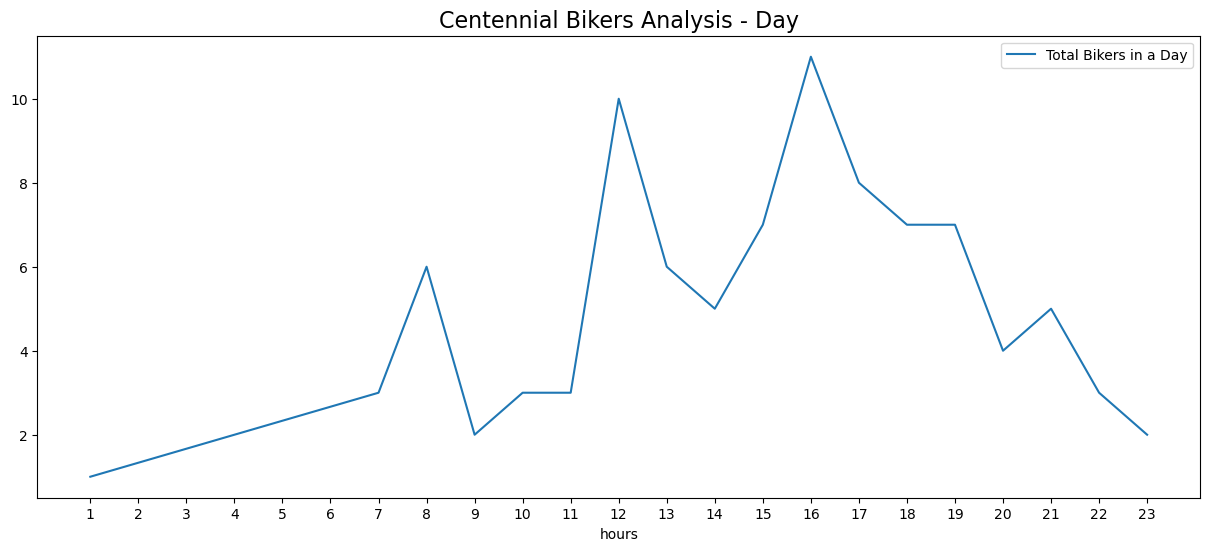

In [33]:
# Centennial Bikers Analysis - Day
plt.figure(figsize=(15,6))

CentennialBikers_df.groupby('start_hour').size().plot(label = 'Total Bikers in a Day')
plt.title('Centennial Bikers Analysis - Day', fontsize=16)
plt.xlabel('hours')
plt.xticks(np.arange(1,24))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Centennial Bikers Analysis Per Day.png')

## Plot Findings

#### The number of Centennial bikers is highest at 12 PM & 4 PM 
##### The number of Centennial bikers sharply increase between 7 - 8 AM, 11 AM - 12 PM. And drops sharply between 8 - 9 AM & 12 - 1 PM.

## Centennial Bikers Analysis By Gender

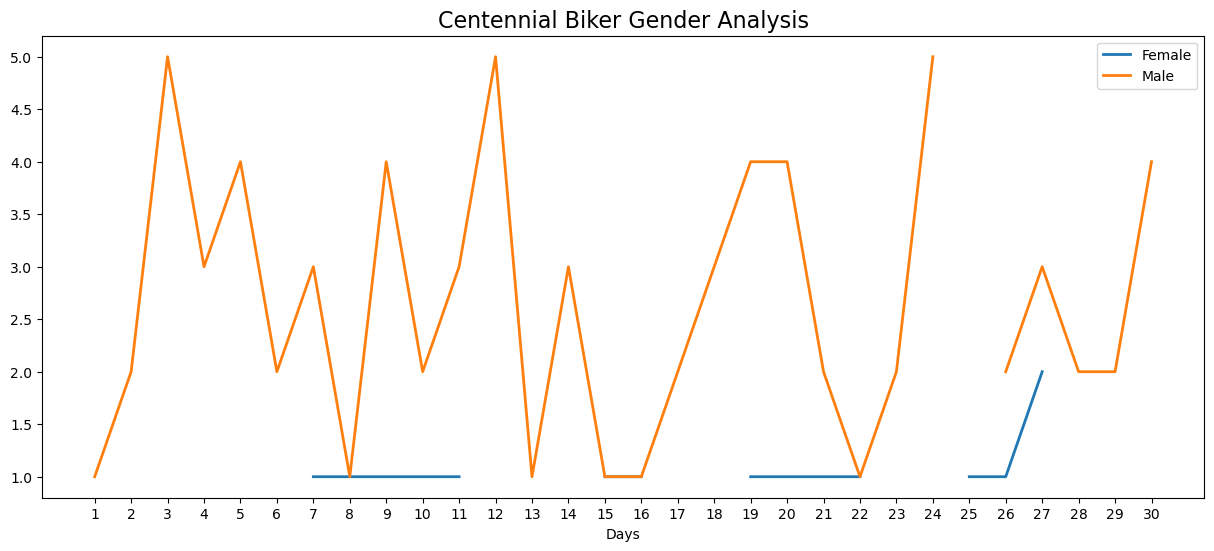

In [34]:
CentennialBikers_Gender = CentennialBikers_df.pivot_table(values='gender', index='start_day', columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Centennial Biker Gender Analysis', fontsize=16)
plt.xlabel('Days')
plt.xticks(np.arange(1,31))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Centennial Biker Gender Analysis.png')

## Plot Findings

#### High number of male centennial bikers as compared to female centennial bikers
#### There were few female centennial bikers between 7 - 11 Sep, 19 - 22 Sep & 25 - 27 Sep 2013
#### Number of male centennial bikers is low on 8, 13, 15, 16, 22 Sep 2013

## Centennial Bikers Analysis By Trip Duration

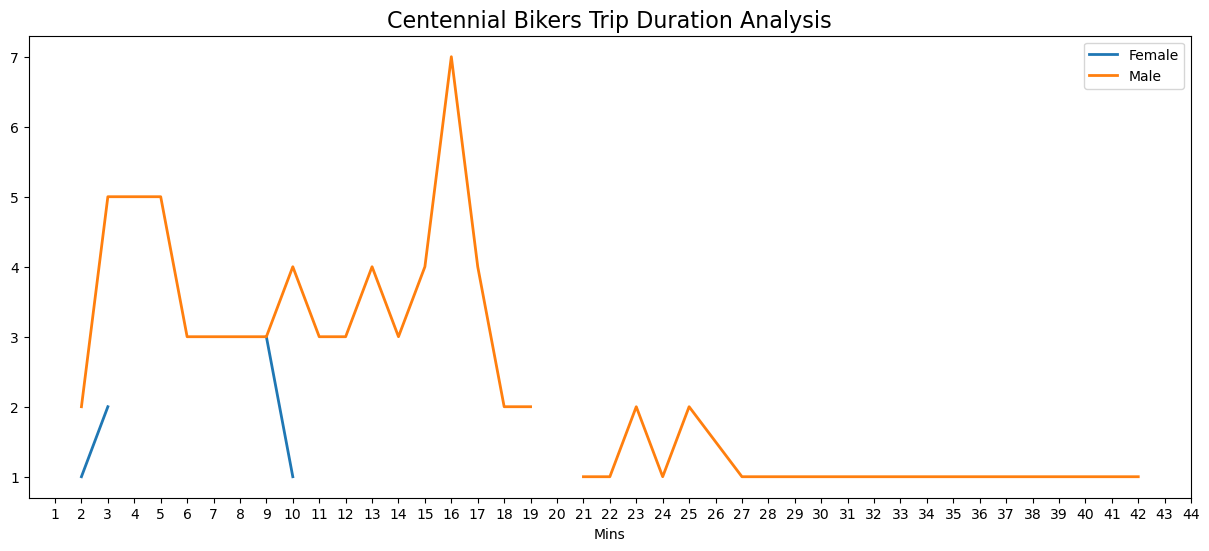

In [35]:
CentennialBikers_TDur = CentennialBikers_df.pivot_table(values='start_hour', index='trip_duration_min', columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Centennial Bikers Trip Duration Analysis', fontsize=16)
plt.xlabel('Mins')
plt.xticks(np.arange(1,45))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Centennial Bikers Trip Duration Analysis.png')

## Millenials Bikers Analysis

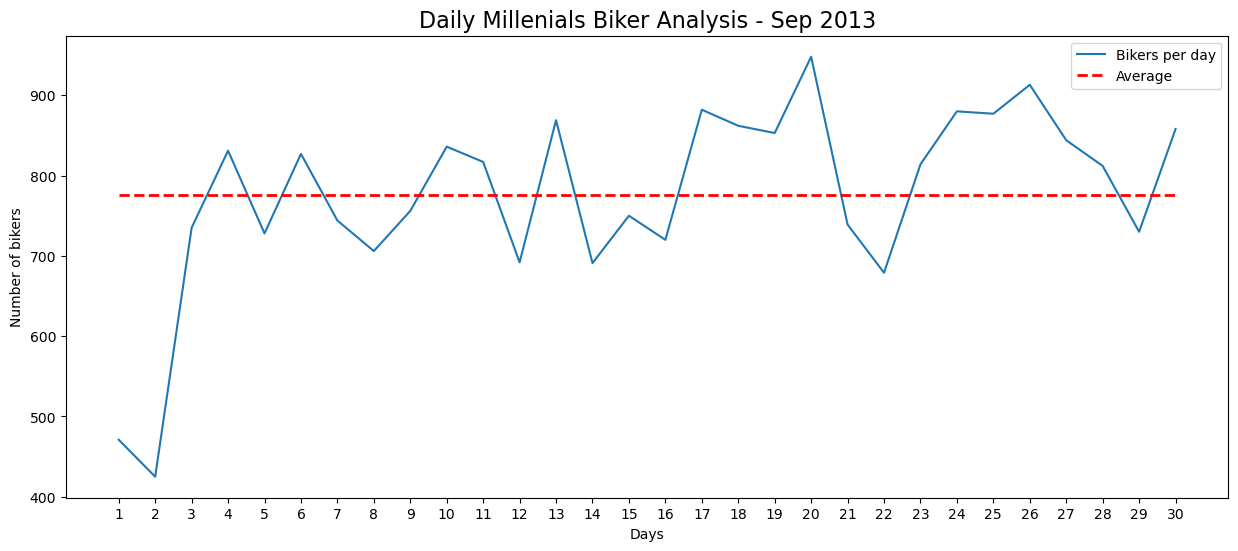

In [36]:
# Millenials Bikers Analysis - Month
MillenialBikers_df = data[(data['birth_year'] >= 1977) & (data['birth_year'] <= 1995)]

MillenialBikers_daily = pd.DataFrame(MillenialBikers_df.groupby('start_day').size())
MillenialBikers_daily['MEAN'] = MillenialBikers_df.groupby('start_day').size().mean()

plt.figure(figsize=(15,6))

MillenialBikers_df.groupby('start_day').size().plot(label='Bikers per day')
MillenialBikers_daily['MEAN'].plot(color='red', linewidth=2, label='Average',ls='--')
plt.title('Daily Millenials Biker Analysis - Sep 2013', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Number of bikers')
plt.xticks(np.arange(1,31))
plt.tick_params(labelsize=10)
plt.legend(prop={'size':10})
plt.savefig('Daily Millenials Biker Analysis - Sep 2013')

## Plot Findings

#### Lowest on 02 Sep 2013
#### Highest on 20 Sep 2013

## Millenials Bikers Analysis Per Week

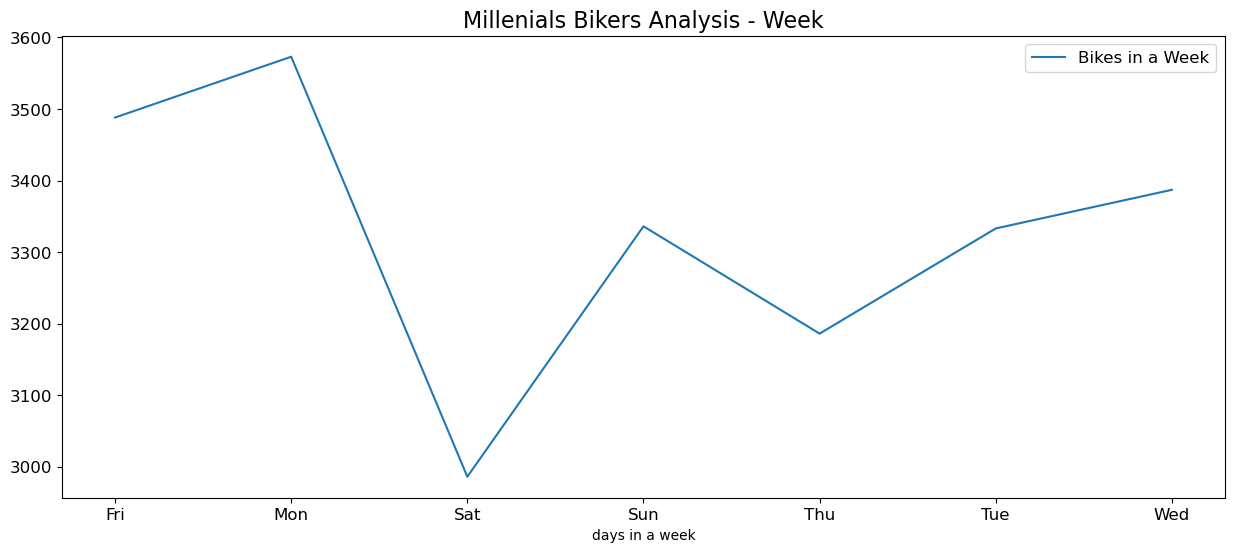

In [37]:
# Millenial Bikers Analysis - Week
plt.figure(figsize=(15,6))

MillenialBikers_df.groupby('weekday').size().plot(label = 'Bikes in a Week')
plt.title('Millenials Bikers Analysis - Week', fontsize=16)
plt.xlabel('days in a week')
plt.legend(prop={'size':12})
plt.tick_params(labelsize=12)
plt.savefig('Millenials Bikers Analysis By Week')

## Plot Findings

#### The number of Millenial bikers are Highest on Monday
#### The number of Millenial bikers are  Lowest on Saturday

## Millenials Bikers Analysis Per Day

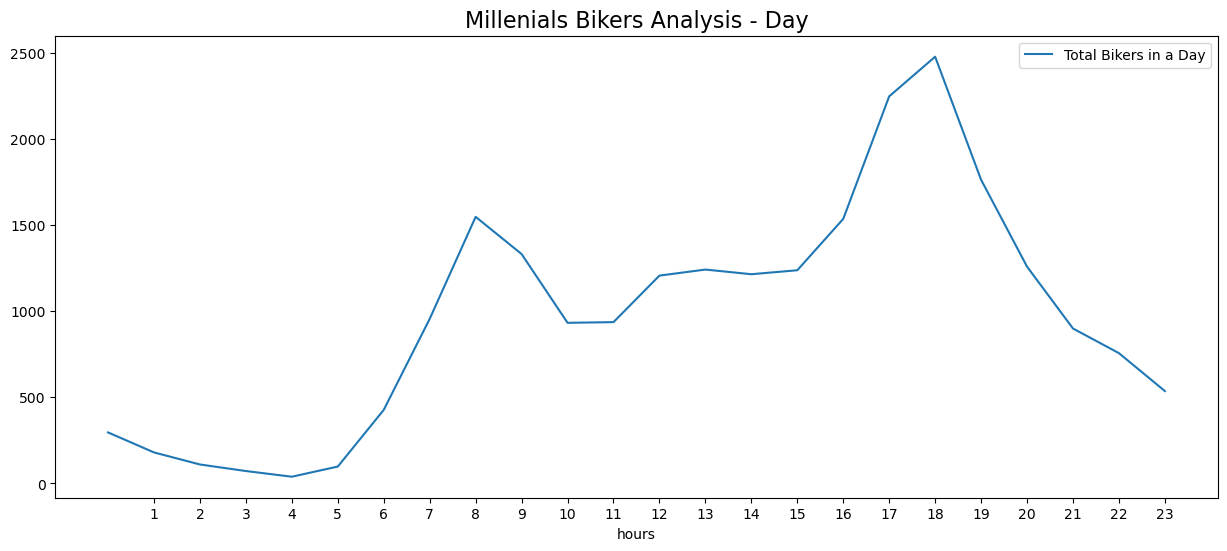

In [38]:
# MIllenial Bikers Analysis - Day
plt.figure(figsize=(15,6))

MillenialBikers_df.groupby('start_hour').size().plot(label = 'Total Bikers in a Day')
plt.title('Millenials Bikers Analysis - Day', fontsize=16)
plt.xlabel('hours')
plt.xticks(np.arange(1,24))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Millenials Bikers Analysis Per Day.png')

## Plot Findings

#### The number of Millenial bikers steeply increase from 5 AM & reach peak at 8 AM
#### They are at their highest at 6 PM

## Millenials Bikers Analysis By Gender

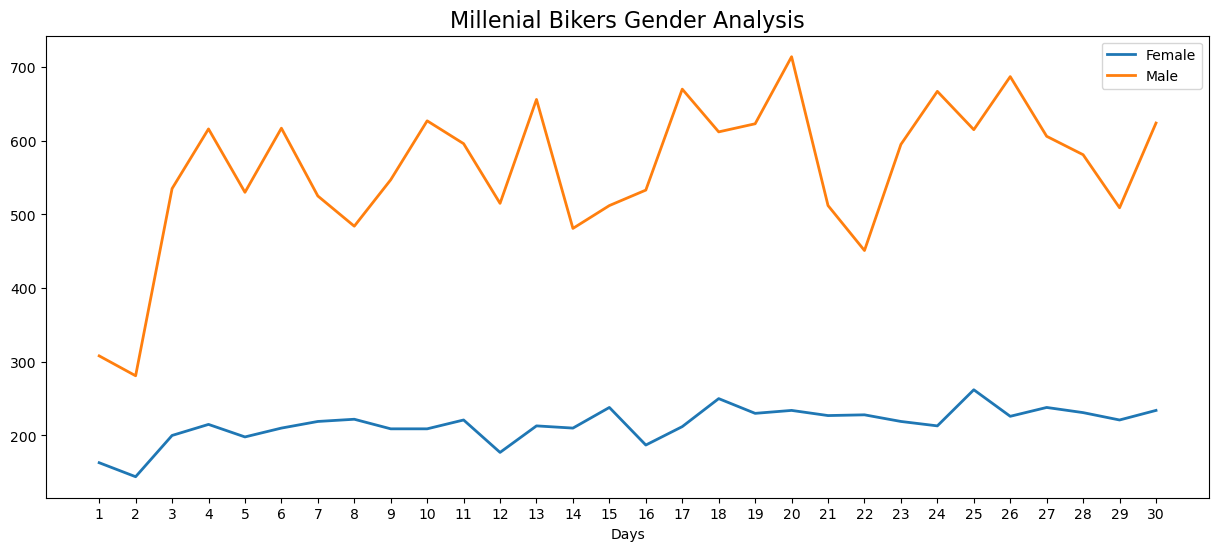

In [39]:
MillenialBikers_Gender = MillenialBikers_df.pivot_table(values='gender', index='start_day', columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Millenial Bikers Gender Analysis', fontsize=16)
plt.xlabel('Days')
plt.xticks(np.arange(1,31))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Millenial Bikers Gender Analysis.png')

## Plot Findings

#### Unlike Female Centennials bikers, there are consistently moderate amount of Female Millenial bikers
#### 20 Sep saw the highest male Millenial bikers

## Millenial Bikers Analysis Per Trip Duration

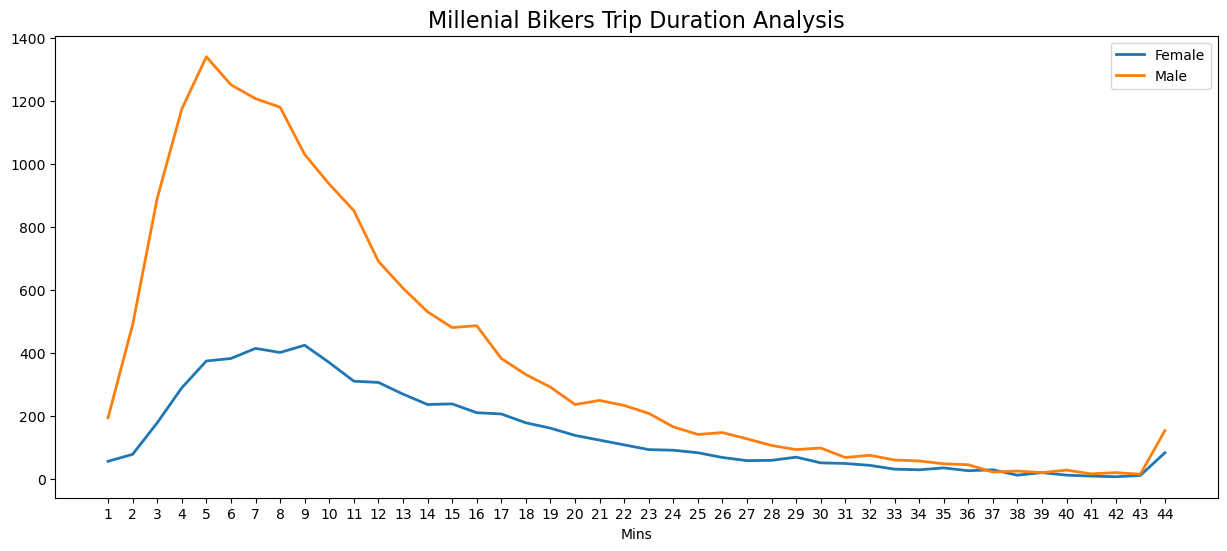

In [40]:
MillenialBikers_TDur = MillenialBikers_df.pivot_table(values='start_hour', index='trip_duration_min', columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Millenial Bikers Trip Duration Analysis', fontsize=16)
plt.xlabel('Mins')
plt.xticks(np.arange(1,45))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Millenial Bikers Trip Duration Analysis.png')

## Gen-X Bikers Analysis

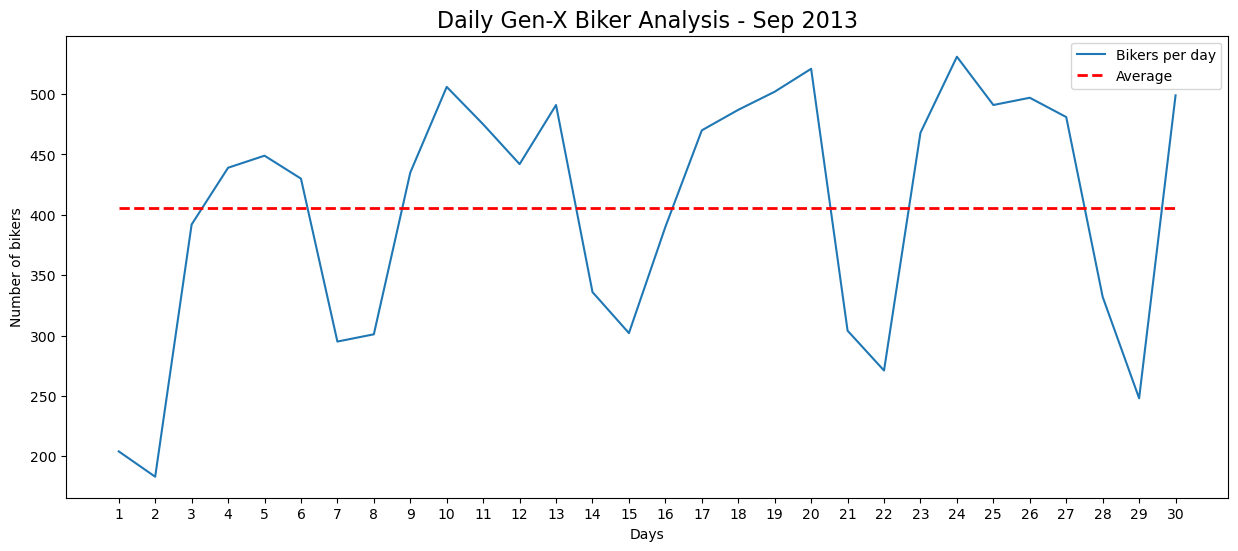

In [41]:
# Gen X Bikers Analysis - Month
GenX_df = data[(data['birth_year'] >= 1965) & (data['birth_year'] <= 1976)]

GenX_daily = pd.DataFrame(GenX_df.groupby('start_day').size())
GenX_daily['MEAN'] = GenX_df.groupby('start_day').size().mean()

plt.figure(figsize=(15,6))

GenX_df.groupby('start_day').size().plot(label='Bikers per day')
GenX_daily['MEAN'].plot(color='red', linewidth=2, label='Average',ls='--')
plt.title('Daily Gen-X Biker Analysis - Sep 2013', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Number of bikers')
plt.xticks(np.arange(1,31))
plt.tick_params(labelsize=10)
plt.legend(prop={'size':10})
plt.savefig('Daily Gen-X Biker Analysis - Sep 2013.png')

## Plot Findings

#### Largest number of bike was on 24 Sep 2013
#### Sharply decrease between 20 - 21 Sep, 27 - 29 Sep
#### Sharply increase between 2 - 3 Sep, 8 - 10 Sep, 22 - 24 Sep

## Gen-X Bikers Analysis Per Week

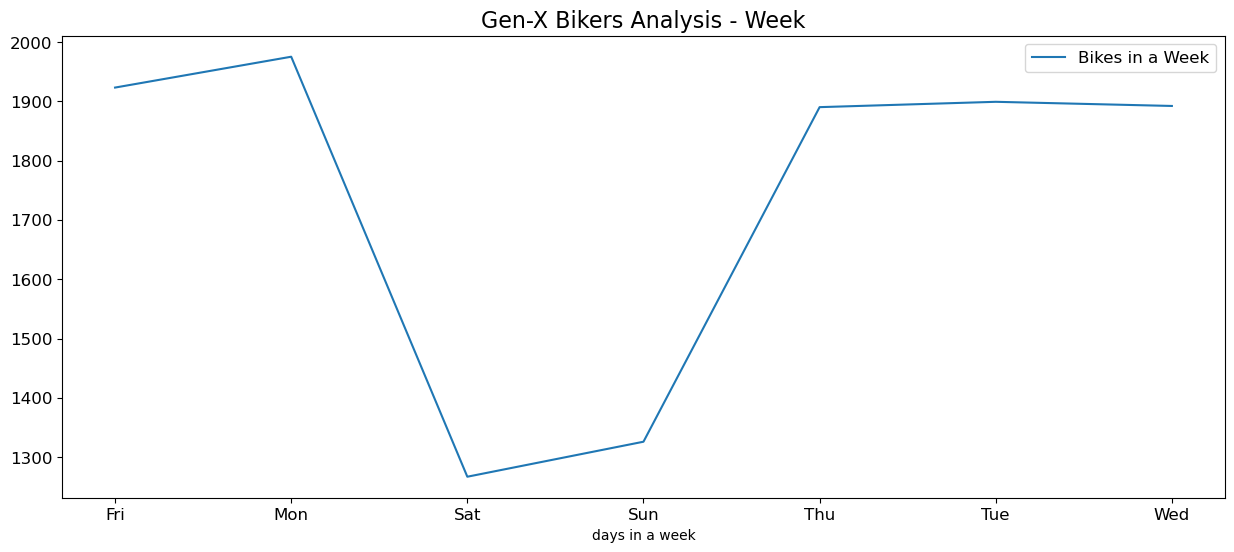

In [42]:
# Gen-X Bikers Analysis - Week
plt.figure(figsize=(15,6))

GenX_df.groupby('weekday').size().plot(label = 'Bikes in a Week')
plt.title('Gen-X Bikers Analysis - Week', fontsize=16)
plt.xlabel('days in a week')
plt.legend(prop={'size':12})
plt.tick_params(labelsize=12)
plt.savefig('Gen-X Bikers Analysis Per Week.png')

## Plot Findings

#### Highest on Monday, Thursday, steady from  Tuesday - Thursday
#### Lowest on Saturday & Sunday

## Gen-X Bikers Analysis - Day

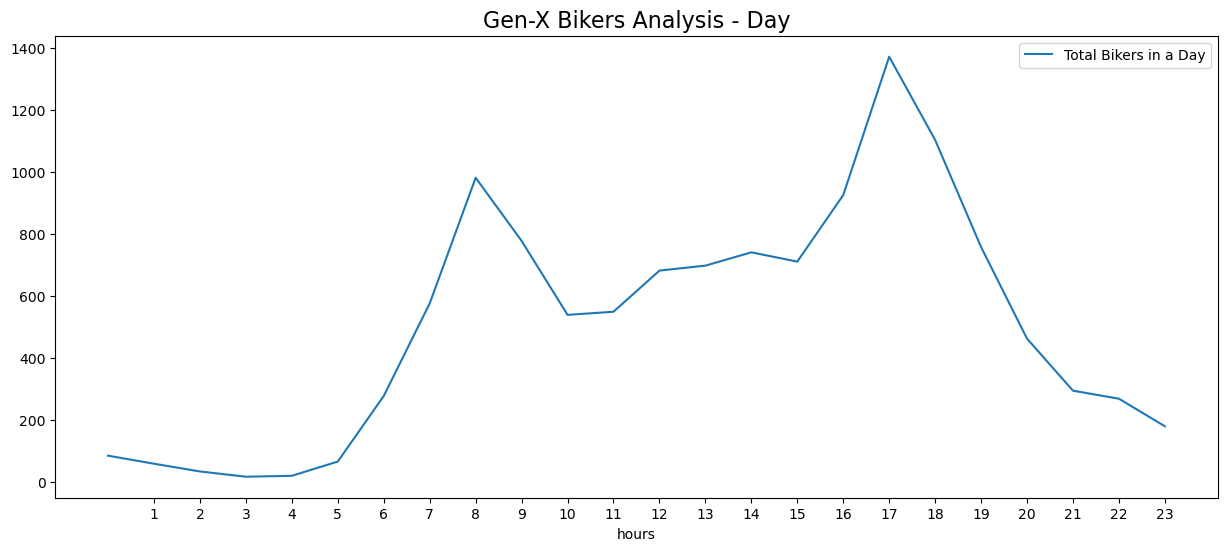

In [43]:
# Gen-X Bikers Analysis - Day
plt.figure(figsize=(15,6))

GenX_df.groupby('start_hour').size().plot(label = 'Total Bikers in a Day')
plt.title('Gen-X Bikers Analysis - Day', fontsize=16)
plt.xlabel('hours')
plt.xticks(np.arange(1,24))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Gen-X Bikers Analysis - Day.png')

## Plot Findings

#### Hihgest at 5 PM & 8 AM
#### A steep increase from 5 AM till 8 AM and a Steep decrease from 5 PM till 8 PM

## Gen-X Bikers Analysis - Gender

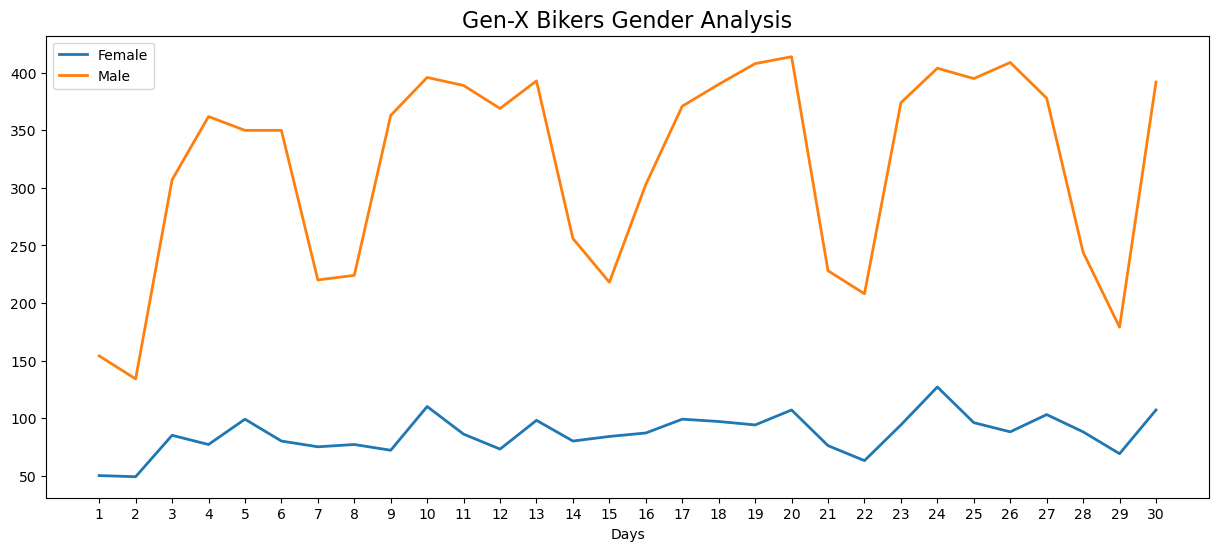

In [44]:
GenXBikers_Gender = GenX_df.pivot_table(values='gender', index='start_day', columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Gen-X Bikers Gender Analysis', fontsize=16)
plt.xlabel('Days')
plt.xticks(np.arange(1,31))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Gen-X Bikers Gender Analysis.png')

## Conclusion

#### Steady number of female Gen-X bikers
#### More male Gen-X bikers compared to female

## Gen-X Bikers Analysis - Trip Duration

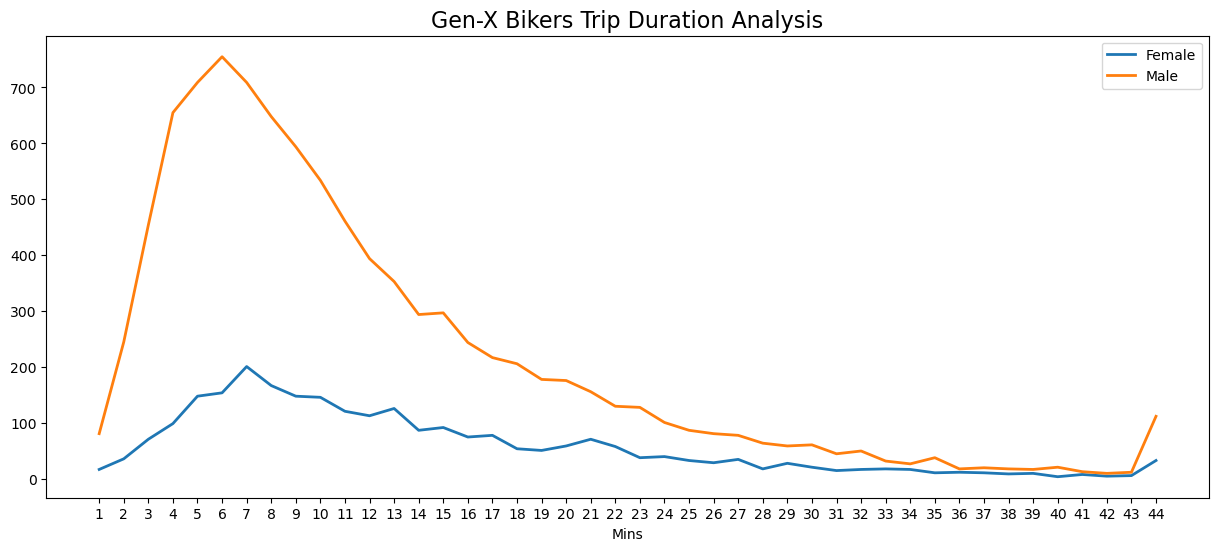

In [45]:
GenXBikers_TDur = GenX_df.pivot_table(values='start_hour', index='trip_duration_min', columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Gen-X Bikers Trip Duration Analysis', fontsize=16)
plt.xlabel('Mins')
plt.xticks(np.arange(1,45))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Gen-X Bikers Trip Duration Analysis.png')

## Baby Boomers Bikers Analysis

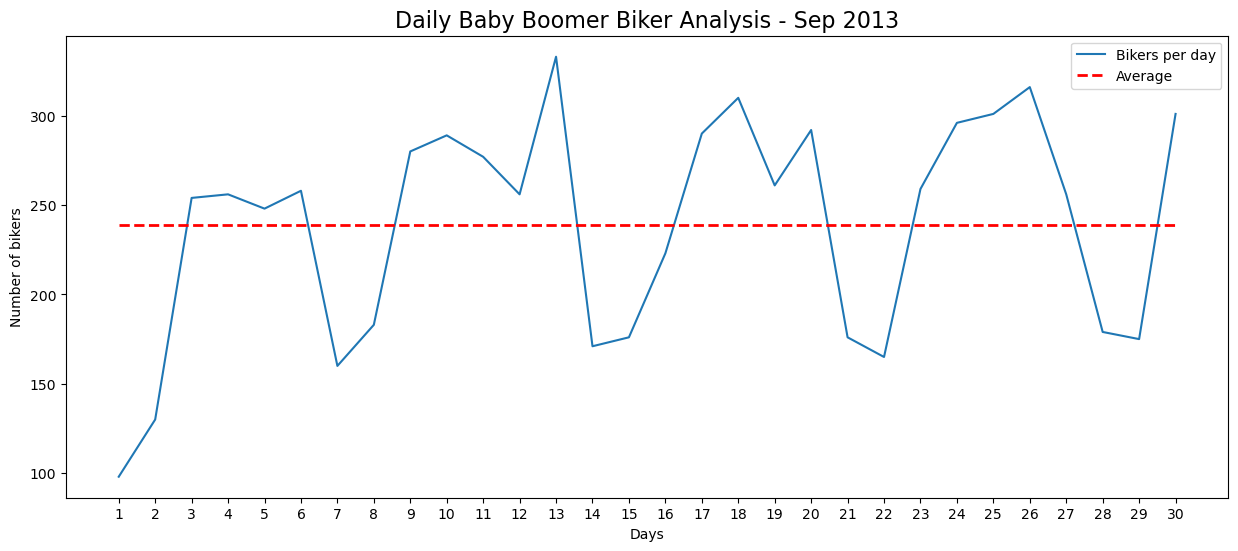

In [46]:
# Baby Boomers Bikers Analysis - Month
BabyB_df = data[(data['birth_year'] >= 1946) & (data['birth_year'] <= 1964)]

BabyB_daily = pd.DataFrame(BabyB_df.groupby('start_day').size())
BabyB_daily['MEAN'] = BabyB_df.groupby('start_day').size().mean()

plt.figure(figsize=(15,6))

BabyB_df.groupby('start_day').size().plot(label='Bikers per day')
BabyB_daily['MEAN'].plot(color='red', linewidth=2, label='Average',ls='--')
plt.title('Daily Baby Boomer Biker Analysis - Sep 2013', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Number of bikers')
plt.xticks(np.arange(1,31))
plt.tick_params(labelsize=10)
plt.legend(prop={'size':10})
plt.savefig('Daily Baby Boomer Biker Analysis - Sep 2013.png')

## Plot Findings

#### Highest on 13 Sep 2013

## Baby Boomer Bikers Analysis - Week

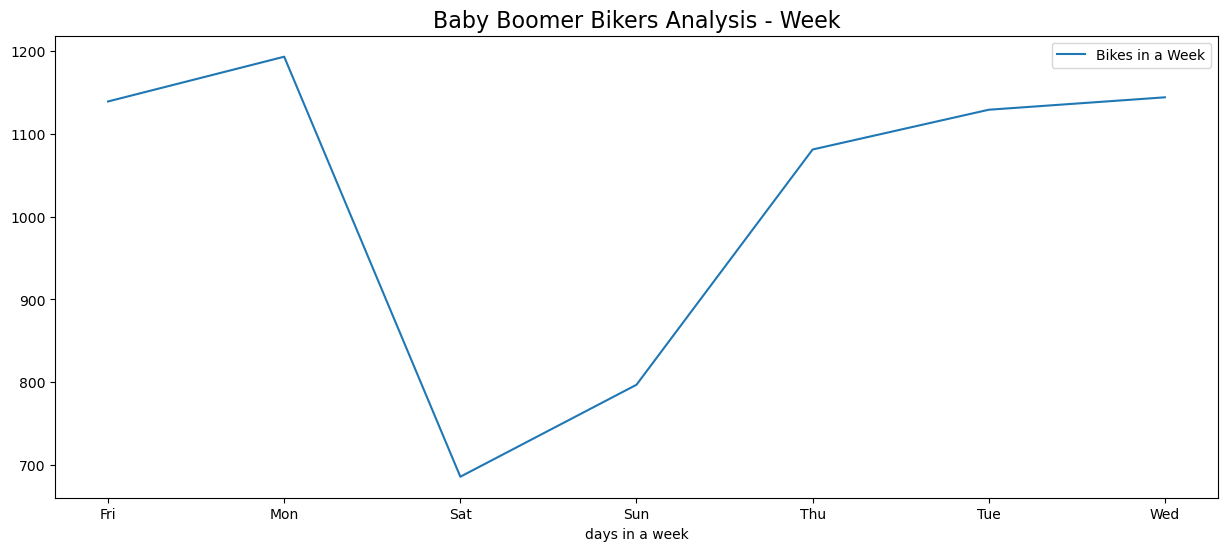

In [47]:
# Baby Boomer Bikers Analysis - Week
plt.figure(figsize=(15,6))

BabyB_df.groupby('weekday').size().plot(label = 'Bikes in a Week')
plt.title('Baby Boomer Bikers Analysis - Week', fontsize=16)
plt.xlabel('days in a week')
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Baby Boomer Bikers Analysis - Week.png')

## Plot Findings

#### Highest on Monday
#### Lowest on Saturday

## Baby Boomer Bikers Analysis - Day

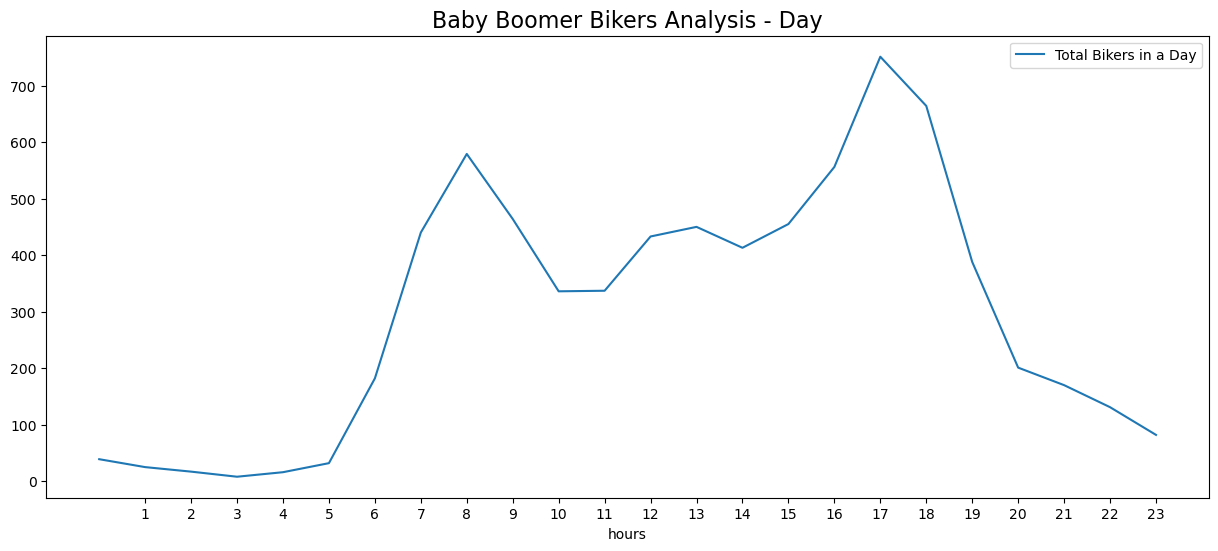

In [48]:
# Baby Boomer Bikers Analysis - Day
plt.figure(figsize=(15,6))

BabyB_df.groupby('start_hour').size().plot(label = 'Total Bikers in a Day')
plt.title('Baby Boomer Bikers Analysis - Day', fontsize=16)
plt.xlabel('hours')
plt.xticks(np.arange(1,24))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Baby Boomer Bikers Analysis - Day.png')

## Plot Findings

#### Highest at 5 PM
#### Steep increase from 5 AM till 8 AM

## Baby Boomer Bikers Analysis - Gender

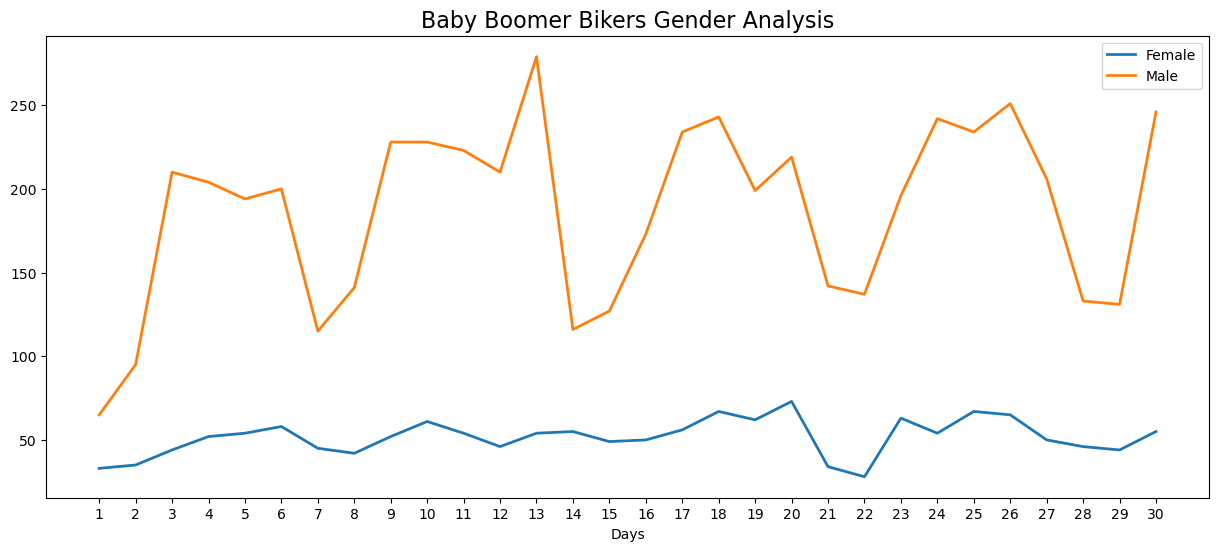

In [49]:
BabyBBikers_Gender = BabyB_df.pivot_table(values='gender', index='start_day', columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Baby Boomer Bikers Gender Analysis', fontsize=16)
plt.xlabel('Days')
plt.xticks(np.arange(1,31))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Baby Boomer Bikers Gender Analysis.png')

## Plot Findings

#### Moderate number of female Baby Boomer Bikers
#### More male Baby Boomer Bikers compared to female

## Baby Boomer Bikers Analysis - Trip Duration

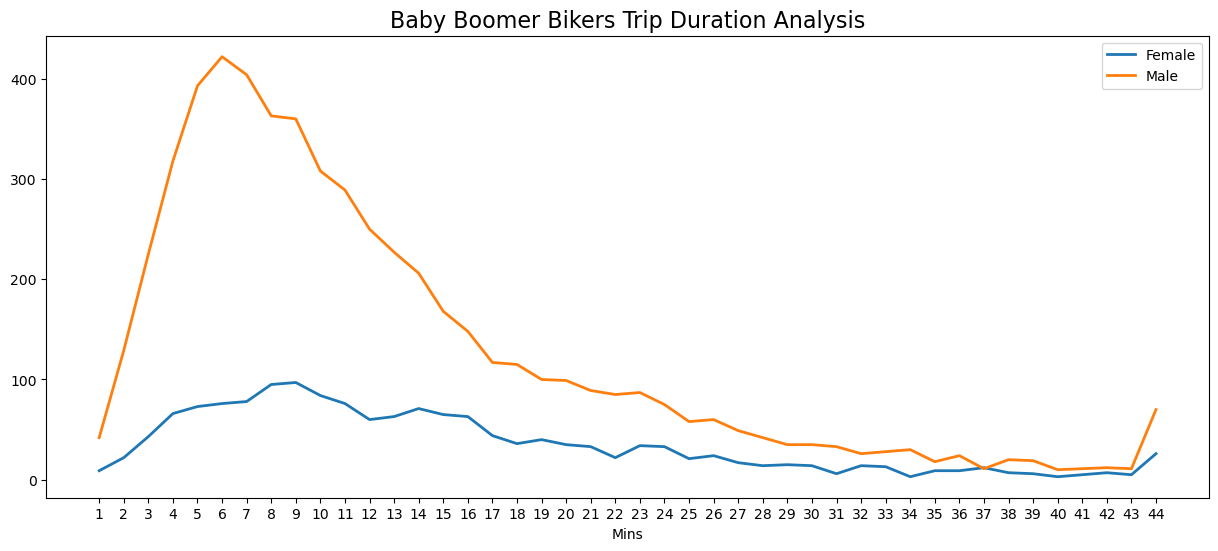

In [50]:
BabyBBikers_TDur = BabyB_df.pivot_table(values='start_hour', index='trip_duration_min', columns='Gender_Cat', aggfunc=len).plot(figsize=(15,6), linewidth=2)
plt.title('Baby Boomer Bikers Trip Duration Analysis', fontsize=16)
plt.xlabel('Mins')
plt.xticks(np.arange(1,45))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)
plt.savefig('Baby Boomer Bikers Trip Duration Analysis.png')

# Spatial Visualisation

In [51]:
data.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,Gender_Cat,trip_duration_min
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,37,9,2013,9,37,9,18,Female,16
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,9,37,12,2013,9,37,12,18,Male,9
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,9,38,18,2013,9,38,18,19,Male,6
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,9,39,28,2013,9,39,28,12,Female,9
5,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,...,9,39,27,2013,9,39,27,22,Female,7


In [52]:
#Creating a base map of NY

def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start,width='50%', height='50%')
    return base_map

In [53]:
#Calling the base map function
base_map = generateBaseMap()
base_map

## **Centennial Bikers - Spatial Heatmap**

In [54]:
# Centennial Bikers - Heatmap

CentennialBikers_df_copy = CentennialBikers_df.copy()
CentennialBikers_df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=CentennialBikers_df_copy[['start_station_latitude', 'start_station_longitude', 'count']].groupby(['start_station_latitude', 'start_station_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#calling the function
base_map

In [55]:
# Millenial Bikers - Heatmap

MillenialBikers_df_copy = MillenialBikers_df.copy()
MillenialBikers_df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=MillenialBikers_df_copy[['start_station_latitude', 'start_station_longitude', 'count']].groupby(['start_station_latitude', 'start_station_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#calling the function
base_map

In [56]:
# Gen-X Bikers - Heatmap

GenX_df_copy = GenX_df.copy()
GenX_df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=GenX_df_copy[['start_station_latitude', 'start_station_longitude', 'count']].groupby(['start_station_latitude', 'start_station_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#calling the function
base_map

In [57]:
# Baby Boomer Bikers - Heatmap

BabyB_df_copy = BabyB_df.copy()
BabyB_df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=BabyB_df_copy[['start_station_latitude', 'start_station_longitude', 'count']].groupby(['start_station_latitude', 'start_station_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#calling the function
base_map

In [58]:
# Overall Male Biker - Heatmap

male_biker_df_copy = male_biker_df.copy()
male_biker_df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=male_biker_df_copy[['start_station_latitude', 'start_station_longitude', 'count']].groupby(['start_station_latitude', 'start_station_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#calling the function
base_map

In [59]:
# Overall Female Biker - Heatmap

female_biker_df_copy = female_biker_df.copy()
female_biker_df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=female_biker_df_copy[['start_station_latitude', 'start_station_longitude', 'count']].groupby(['start_station_latitude', 'start_station_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#calling the function
base_map

In [60]:
#Exporting dataframe
data.to_csv(os.path.join(path,'02 Data','Prepared Data', 'Data.csv'))